In [1]:
#import sample data
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info

In [5]:
#Check which sample has cancer (label). Write a number to 569. 1 means ill.
bc.target[500]

np.int64(1)

In [6]:
#Shows the shape of y or our lables.
bc.target.shape

(569,)

In [7]:
#Check features for each patient.
bc.data[401]

array([1.193e+01, 1.091e+01, 7.614e+01, 4.427e+02, 8.872e-02, 5.242e-02,
       2.606e-02, 1.796e-02, 1.601e-01, 5.541e-02, 2.522e-01, 1.045e+00,
       1.649e+00, 1.895e+01, 6.175e-03, 1.204e-02, 1.376e-02, 5.832e-03,
       1.096e-02, 1.857e-03, 1.380e+01, 2.014e+01, 8.764e+01, 5.895e+02,
       1.374e-01, 1.575e-01, 1.514e-01, 6.876e-02, 2.460e-01, 7.262e-02])

In [8]:
#Shows the shape of x or data input.
bc.data.shape

(569, 30)

# Preprocessing

# Test/Train split

In [11]:
from sklearn.model_selection import train_test_split

# x = features = bc.data
# y = label = bc.target
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [17]:
# Make it look better!
# New python tip: If you want to show the value of a variable along with other texts in just one "" You can use this form:
print(f"x = feature => train: {x_train.shape} - test: {x_test.shape}")
print(f"y = label = y => train: {y_train.shape} - test: {y_test.shape}")

x = feature => train: (455, 30) - test: (114, 30)
y = label = y => train: (455,) - test: (114,)


# Normalize

In [20]:
x_train[0]

array([0.37810592, 0.24484275, 0.36231083, 0.23007423, 0.43849617,
       0.18241212, 0.06096532, 0.18792247, 0.3900325 , 0.13244331,
       0.0578671 , 0.2423214 , 0.05352683, 0.03264487, 0.08477673,
       0.1099205 , 0.02394997, 0.22183374, 0.07905105, 0.03449598,
       0.29099964, 0.29264392, 0.26988396, 0.14955269, 0.28546162,
       0.12638715, 0.05309904, 0.29228384, 0.16538537, 0.06060606])

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

✅ Always use fit_transform() on training data and transform() on test data to avoid data leakage! 🚀

🔹 fit_transform():
Fits the scaler on the data (calculates the min and max values).

Transforms the data using these calculated values.

Used on training data (x_train) because we need to compute the scaling parameters from it.

🔹 transform():
Uses the previously computed min and max values (from fit_transform()).

Applies the same transformation to new data without recalculating the min/max.

Used on test/validation data (x_test) to ensure consistency.

In [21]:
x_train[0]

array([0.37810592, 0.24484275, 0.36231083, 0.23007423, 0.43849617,
       0.18241212, 0.06096532, 0.18792247, 0.3900325 , 0.13244331,
       0.0578671 , 0.2423214 , 0.05352683, 0.03264487, 0.08477673,
       0.1099205 , 0.02394997, 0.22183374, 0.07905105, 0.03449598,
       0.29099964, 0.29264392, 0.26988396, 0.14955269, 0.28546162,
       0.12638715, 0.05309904, 0.29228384, 0.16538537, 0.06060606])

In [22]:
y_train[0]

np.int64(1)

# Classification

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)*100
    acc_test = accuracy_score(y_test, y_pred_test)*100

    r = recall_score(y_test, y_pred_test)*100
    p = precision_score(y_test, y_pred_test)*100

    print(f"acc_train = {acc_train}%, acc_test = {acc_test}%, precision = {p}%, recall = {r}%")

    return acc_train, acc_test, p, r

## 1. Naive bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [60]:
y_pred_train_gnb = gnb.predict(x_train)
y_pred_test_gnb = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, r_gnb, p_gnb = calculate_metrics(y_train, y_test, y_pred_train_gnb, y_pred_test_gnb)

acc_train = 92.74725274725274%, acc_test = 97.36842105263158%, precision = 97.26027397260275%, recall = 98.61111111111111%


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [46]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

acc_train_rf, acc_test_rf, r_rf, p_rf = calculate_metrics(y_train, y_test, y_pred_train_rf, y_pred_test_rf)

acc_train = 1.0, acc_test = 0.9736842105263158, precision = 0.9859154929577465, recall = 0.9722222222222222


# Comparison

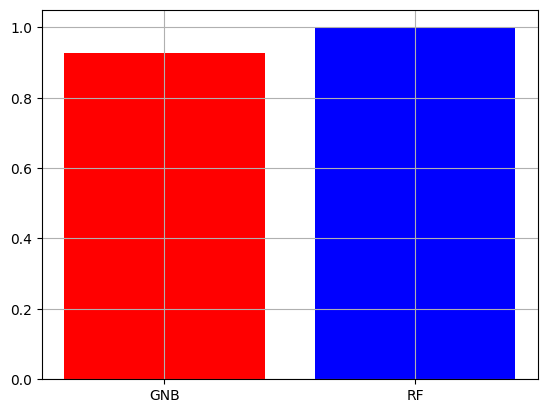

In [49]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_rf]

title = ["GNB", 'RF']

colors = ['red', 'blue']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

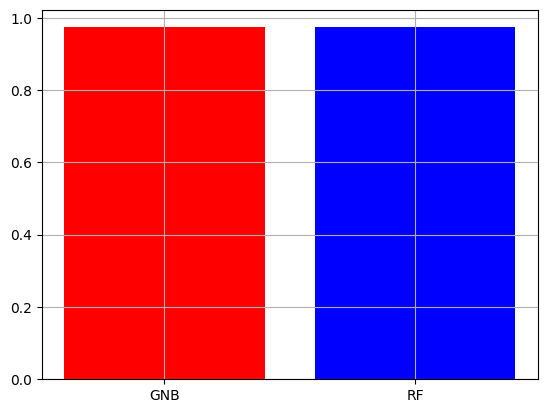

In [50]:
acc_test = [acc_test_gnb, acc_test_rf]

title = ["GNB", 'RF']

colors = ['red', 'blue']

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()